In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
labels = ["NC(0.1)", "NC(0.3)", "TKNC", "TKNP", "KMNC", "NBC", "SNAC"]

def get_number(s) : 
    return s.split(" ")[1]

def load_coverage_result(fpath) :
    f = open(fpath, "r")
    lines = f.readlines()
#     print(lines)
    res = {}
    for key in ["x"] + labels :
        res[key] = []
    for i, l in enumerate(lines) :
        if i % 10 == 2 : res["x"].append(int(get_number(l)))
        elif i % 10 == 3 : res["NC(0.1)"].append(float(get_number(l)))    
        elif i % 10 == 4 : res["NC(0.3)"].append(float(get_number(l)))    
        elif i % 10 == 5 : res["TKNC"].append(float(get_number(l)))    
        elif i % 10 == 6 : res["TKNP"].append(float(get_number(l)))    
        elif i % 10 == 7 : res["KMNC"].append(float(get_number(l)))    
        elif i % 10 == 8 : res["NBC"].append(float(get_number(l)))    
        elif i % 10 == 9 : res["SNAC"].append(float(get_number(l)))    
    return pd.DataFrame(data=res)

    
    
dataset_name = "mnist"
model_name = "lenet1"
attack_name = "cw"
fpath = "../coverage/{}/adv/{}/{}/coverage_result.txt".format(dataset_name, model_name, attack_name)

df = load_coverage_result(fpath)
df.head()

,x,NC(0.1),NC(0.3),TKNC,TKNP,KMNC,NBC,SNAC
0,1,0.927831,0.304667,0.001729,1.0,0.100000,0.000000,0.000000
1,201,1.000000,0.903198,0.117978,200.0,0.736474,0.004754,0.007779
2,401,1.000000,0.919188,0.171564,395.0,0.797407,0.007995,0.013397
3,601,1.000000,0.927398,0.205704,587.0,0.825454,0.011668,0.016422
4,801,1.000000,0.944685,0.228608,773.0,0.846500,0.015557,0.020311


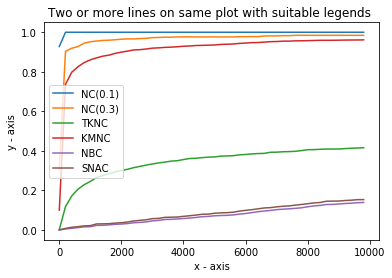

In [23]:
for label in labels :
    if label != "TKNP" :
        plt.plot(df["x"], df[label], label = label)
    
plt.xlabel('x')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

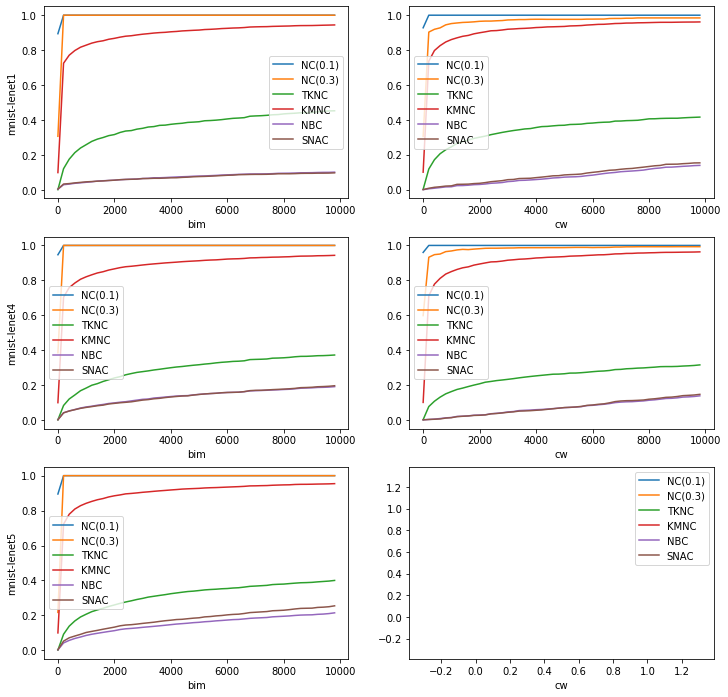

In [55]:
datasets = ['mnist', 'cifar', 'svhn']
datasets = ['mnist']
model_dict = {
    'mnist': ['lenet1', 'lenet4', 'lenet5'],
    'cifar': ['vgg16', 'resnet20'],
    'svhn': ['svhn_model', 'svhn_first', 'svhn_second']
}

model_dict = {
    'mnist': ['lenet1', 'lenet4', "lenet5"],
}

# datasets = [""]
attacks = ["bim", "cw"]

n_y = 0
for dataset_name in datasets :
    for model_name in model_dict[dataset_name] :
        n_y += 1

fig, axs = plt.subplots(nrows=n_y, ncols=len(attacks), figsize=(6 * len(attacks), 4*n_y))

i = 0
for dataset_name in datasets :
    for model_name in model_dict[dataset_name] :
        y_label = dataset_name + "-" + model_name
        for j, attack_name in enumerate(attacks) :
            fpath = "../coverage/{}/adv/{}/{}/coverage_result.txt".format(dataset_name, model_name, attack_name)
            df = load_coverage_result(fpath)
            for label in labels :
                if label != "TKNP" :
                    axs[i][j].plot(df["x"], df[label], label = label)
                    plt.setp(axs[i, j], xlabel=attack_name)
            axs[i][j].legend()
        plt.setp(axs[i, 0], ylabel=y_label)
        i += 1
        

# path = "plot/bot-detail-analysis-" + str(sample) + ".png"
# fig.savefig(path, bbox_inches='tight')